In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

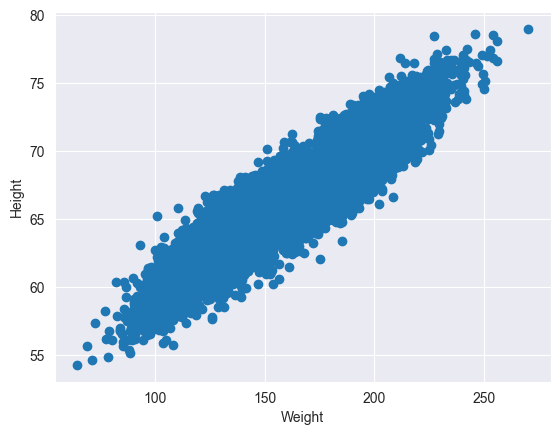

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

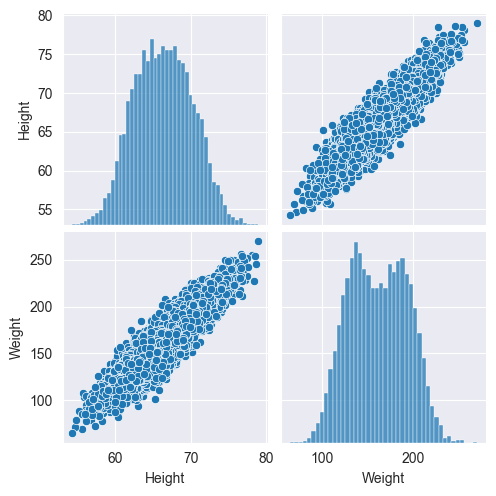

In [4]:
sns.pairplot(df)

In [5]:
df.drop("Gender", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
X = df[['Weight']]
y = df['Height']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [3.55713083]
Intercept: 66.37829176017918


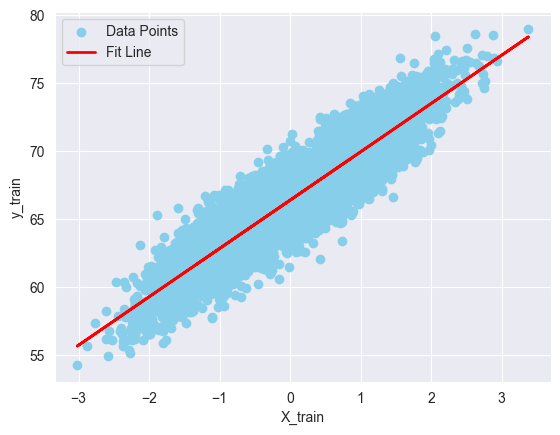

In [12]:
plt.scatter(X_train, y_train, color='skyblue', label='Data Points')
plt.plot(X_train, regression.predict(X_train), color='red', linewidth=2, label='Fit Line')

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

plt.show()

In [13]:
y_pred = regression.predict(X_test)

In [14]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Squared Error:  2.0940540898678415
Mean Absolute Error:  1.1651096980225415
Root Mean Squared Error:  1.4470846864879199


In [15]:
r2=r2_score(y_test,y_pred)
n = len(y_train)
p = X_train.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("r2_score: ", r2)
print("Adjusted r2_score: ", adj_r2)

r2_score:  0.8582266778480969
Adjusted r2_score:  0.8582089517513037


In [16]:
model = sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[-2.59980384  2.86149285  6.09430388 ... -1.01118021  0.94831352
 -0.36991449]


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              22.96
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                    1.68e-06
Time:                        11:36:32   Log-Likelihood:                         -44916.
No. Observations:                8000   AIC:                                  8.983e+04
Df Residuals:                    7999   BIC:                                  8.984e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5571      0.742      4.792      0.000       2.102       5.012
==============================================================================
Omnibus:                        3.991   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.966
Skew:                          -0.054   Prob(JB):                        0.138
Kurtosis:                       3.016   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
## Prediction For new data
regression.predict(scaler.transform([[172]]))

array([67.53710529])